# Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
em_data = pd.read_excel('../data/raw/emdat_extreme_temperature_deaths_2000_2025.xlsx')

In [13]:
em_data.shape

(535, 46)

In [6]:
em_data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
1,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25
2,2000-0029-BGR,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGR,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":722,""adm1_name"":""Sofia""},{""adm1_...",2003-07-01,2023-09-25
3,2000-0092-EGY,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,EGY,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":61518,""adm1_name"":""Fayoum""},{""ad...",2003-07-01,2023-09-25
4,2000-0165-RUS,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,RUS,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2535,""adm1_name"":""Moskva""}]",2003-07-01,2023-09-25


In [8]:
em_data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [11]:
em_data['Disaster Subtype'].value_counts(normalize=True)

Disaster Subtype
Heat wave                   0.454206
Cold wave                   0.403738
Severe winter conditions    0.142056
Name: proportion, dtype: float64

In [12]:
em_data.isnull().sum()

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                 375
Event Name                                   534
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                     109
Origin                                       529
Associated Types                             453
OFDA/BHA Response                              0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  527
Magnitude           

In [16]:
em_data['Magnitude Scale']

0      °C
1      °C
2      °C
3      °C
4      °C
       ..
530    °C
531    °C
532    °C
533    °C
534    °C
Name: Magnitude Scale, Length: 535, dtype: object

In [20]:
features = ['DisNo.', 'Disaster Subtype',
       'Event Name', 'ISO', 'Country', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', "AID Contribution ('000 US$)", 'Magnitude',
       'Magnitude Scale', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI',
       'Admin Units', 'Entry Date', 'Last Update']

In [22]:
df = em_data[features]

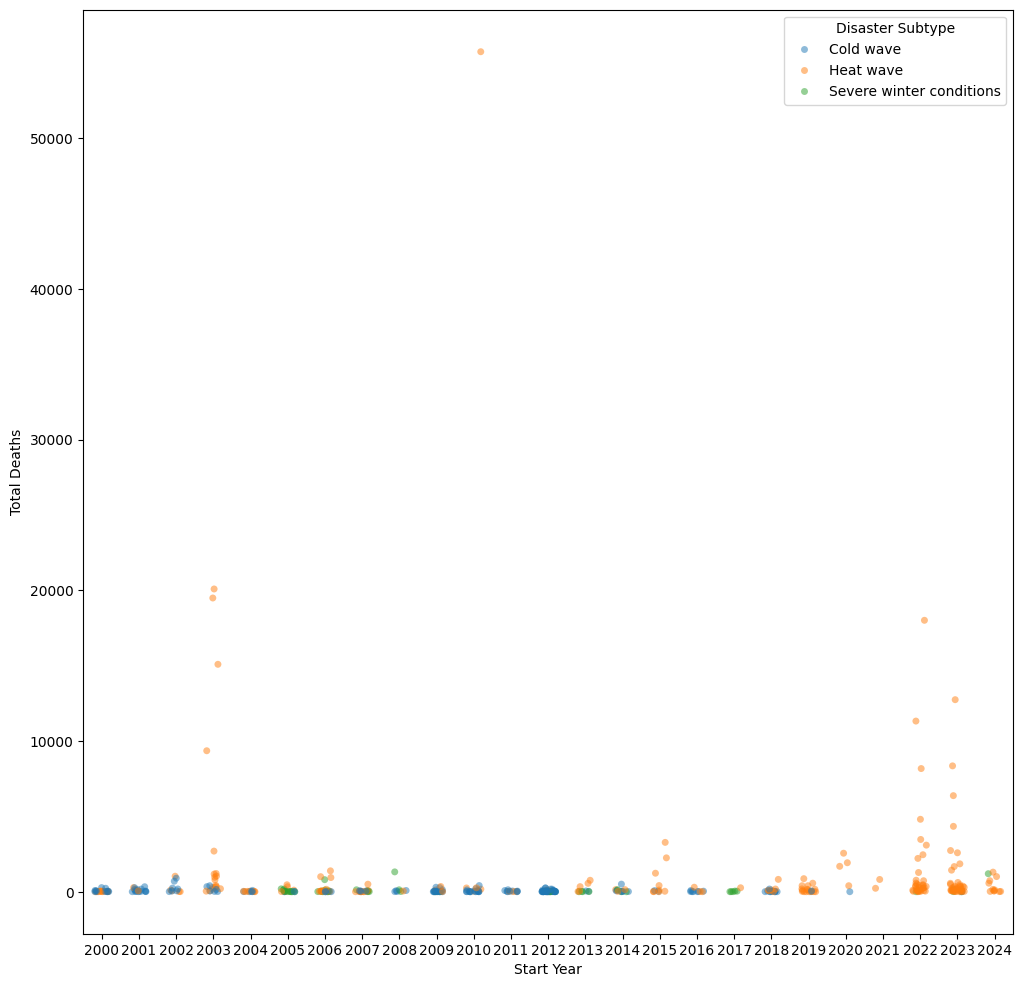

In [36]:
fig, ax = plt.subplots(figsize=(12,12))
sns.stripplot(data=df, x= 'Start Year', y= 'Total Deaths', hue= 'Disaster Subtype', alpha=0.5, jitter= 0.2, ax=ax);

In [37]:
df['Magnitude Scale'].value_counts()

Magnitude Scale
°C    535
Name: count, dtype: int64

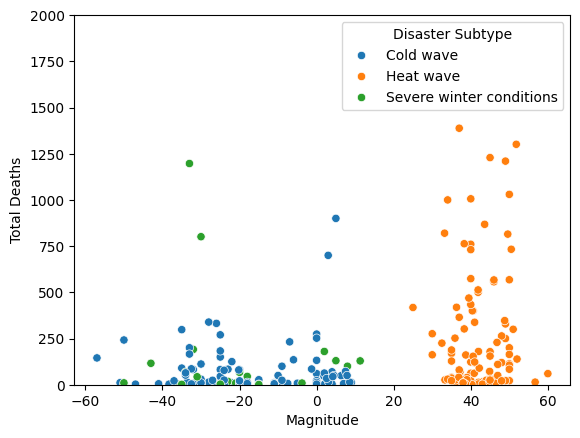

In [42]:
fig, ax = plt.subplots()

sns.scatterplot(data = df, x='Magnitude', y='Total Deaths', hue='Disaster Subtype')
ax.set_ylim(0,2_000);

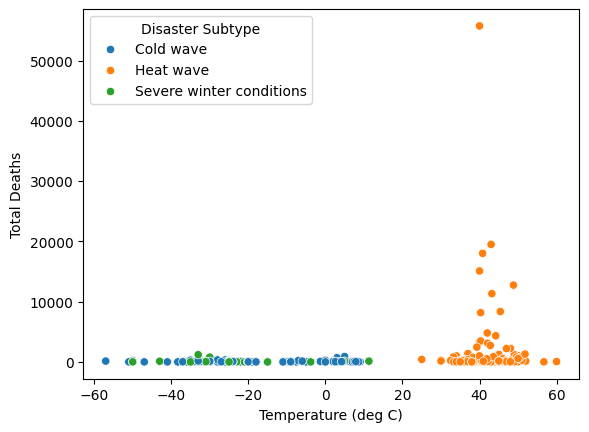

In [43]:
fig, ax = plt.subplots()

sns.scatterplot(data = df, x='Magnitude', y='Total Deaths', hue='Disaster Subtype')
ax.set_xlabel('Temperature (deg C)');

In [44]:
df_heat = df[df['Disaster Subtype'] == 'Heat wave']

In [ ]:
fig, ax